## Using logistic regression on all patient numeric data

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Imputed_ALLdata_Ivan.csv")
df

,LLHold,LLLatency,LRHold,LRLatency,LSHold,LSLatency,RLHold,RLLatency,RRHold,RRLatency,...,RHoldKurt,RLatencyKurt,SHoldKurt,SLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,HoldMean,LatencyMean,Parkinsons
0,82.169040,263.586377,81.946810,277.610541,113.966144,205.839312,74.671148,416.856331,79.294563,273.864624,...,44.944694,-1.138668,18.938591,2.047950,-1.555339,-10.278246,-139.245790,87.090011,286.112183,1
1,97.654140,406.716242,107.138017,411.718182,134.881818,328.748864,100.917949,430.258974,96.400784,365.736471,...,110.960777,-0.838186,0.696979,0.597395,-2.663930,40.979771,-18.540793,102.873688,405.924138,0
2,143.399528,347.882547,105.325886,313.541489,94.020690,338.639655,163.700000,310.799454,106.208750,322.170833,...,24.142310,-0.177558,6.900573,-0.340523,48.079984,25.711714,2.742036,123.793469,325.569638,0
3,87.418105,316.334084,95.753906,351.168548,95.613694,355.430828,91.759075,311.695939,87.046902,338.282118,...,2.216855,-0.447737,6.529645,-0.368982,-1.529482,-21.948033,39.472609,90.409640,327.473805,1
4,81.947761,360.546269,88.875000,460.950000,92.927778,424.529894,78.100000,240.200000,83.886364,355.140909,...,2.232887,3.726850,66.079168,10.284850,-2.262416,5.405360,220.750000,90.442364,406.111687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,114.451691,380.816425,114.250244,378.445122,118.110000,275.342000,109.490793,322.538107,107.901394,379.116725,...,0.690160,0.117846,3.939433,4.542159,0.311773,1.699700,55.907015,112.126444,363.161854,1
187,109.729223,353.762243,110.151315,353.846670,119.099873,381.563104,114.032972,347.541292,108.025824,359.277471,...,14.220614,-0.231702,6.849089,-0.533829,2.120533,-5.515228,6.305378,111.292535,358.254872,1
188,80.446667,288.293333,93.760000,353.140000,101.600000,345.700000,92.071429,403.742857,91.800000,314.466667,...,1.291153,0.341831,3.693052,2.262993,-6.379487,-26.173333,-50.602857,88.709615,337.600000,1
189,101.543809,158.094059,92.716100,153.591263,88.772980,173.464290,97.558775,142.231463,95.320305,169.229961,...,-0.046371,1.663209,0.535376,0.230168,3.168687,-11.135901,11.359799,93.502747,157.165172,1


In [3]:
X = df.iloc[:,0:101]
y = df.iloc[:,101]  # Target is the Parkinsons column

In [4]:
X

,LLHold,LLLatency,LRHold,LRLatency,LSHold,LSLatency,RLHold,RLLatency,RRHold,RRLatency,...,LLatencyKurt,RHoldKurt,RLatencyKurt,SHoldKurt,SLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,HoldMean,LatencyMean
0,82.169040,263.586377,81.946810,277.610541,113.966144,205.839312,74.671148,416.856331,79.294563,273.864624,...,-1.160590,44.944694,-1.138668,18.938591,2.047950,-1.555339,-10.278246,-139.245790,87.090011,286.112183
1,97.654140,406.716242,107.138017,411.718182,134.881818,328.748864,100.917949,430.258974,96.400784,365.736471,...,-0.736605,110.960777,-0.838186,0.696979,0.597395,-2.663930,40.979771,-18.540793,102.873688,405.924138
2,143.399528,347.882547,105.325886,313.541489,94.020690,338.639655,163.700000,310.799454,106.208750,322.170833,...,0.235101,24.142310,-0.177558,6.900573,-0.340523,48.079984,25.711714,2.742036,123.793469,325.569638
3,87.418105,316.334084,95.753906,351.168548,95.613694,355.430828,91.759075,311.695939,87.046902,338.282118,...,0.083280,2.216855,-0.447737,6.529645,-0.368982,-1.529482,-21.948033,39.472609,90.409640,327.473805
4,81.947761,360.546269,88.875000,460.950000,92.927778,424.529894,78.100000,240.200000,83.886364,355.140909,...,0.813987,2.232887,3.726850,66.079168,10.284850,-2.262416,5.405360,220.750000,90.442364,406.111687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,114.451691,380.816425,114.250244,378.445122,118.110000,275.342000,109.490793,322.538107,107.901394,379.116725,...,0.452336,0.690160,0.117846,3.939433,4.542159,0.311773,1.699700,55.907015,112.126444,363.161854
187,109.729223,353.762243,110.151315,353.846670,119.099873,381.563104,114.032972,347.541292,108.025824,359.277471,...,-0.090862,14.220614,-0.231702,6.849089,-0.533829,2.120533,-5.515228,6.305378,111.292535,358.254872
188,80.446667,288.293333,93.760000,353.140000,101.600000,345.700000,92.071429,403.742857,91.800000,314.466667,...,-0.414771,1.291153,0.341831,3.693052,2.262993,-6.379487,-26.173333,-50.602857,88.709615,337.600000
189,101.543809,158.094059,92.716100,153.591263,88.772980,173.464290,97.558775,142.231463,95.320305,169.229961,...,3.033984,-0.046371,1.663209,0.535376,0.230168,3.168687,-11.135901,11.359799,93.502747,157.165172


In [5]:
y

0      1
1      0
2      0
3      1
4      1
      ..
186    1
187    1
188    1
189    1
190    1
Name: Parkinsons, Length: 191, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#pipe = Pipeline([('scale',StandardScaler()),
 #                   ('svm',LinearSVC(C=1, loss="hinge"))])
#pipe.fit(X_train, y_train)
scaler = StandardScaler()

In [8]:
scaler.fit(X)

StandardScaler()

In [9]:
X_scaled = scaler.transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
## Now split the data
## Have 20% for testing
## Set 614 as the random state
## and stratify the split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,
                                                test_size=.25,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

In [13]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [14]:
y_train_pred = log_reg.predict(X_train)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_train, y_train_pred)

array([[ 22,  13],
       [  3, 105]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.8898305084745762
0.9722222222222222


In [20]:
probs = log_reg.predict_proba(X_train)


In [21]:
from sklearn.metrics import roc_curve

In [22]:
roc_curve(y_train,probs[:,1])

(array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
        0.05714286, 0.05714286, 0.08571429, 0.08571429, 0.11428571,
        0.11428571, 0.17142857, 0.17142857, 0.2       , 0.2       ,
        0.22857143, 0.22857143, 0.25714286, 0.25714286, 0.28571429,
        0.28571429, 0.31428571, 0.31428571, 0.34285714, 0.34285714,
        0.37142857, 0.37142857, 0.45714286, 0.45714286, 1.        ]),
 array([0.        , 0.00925926, 0.55555556, 0.55555556, 0.69444444,
        0.69444444, 0.72222222, 0.72222222, 0.78703704, 0.78703704,
        0.81481481, 0.81481481, 0.83333333, 0.83333333, 0.89814815,
        0.89814815, 0.90740741, 0.90740741, 0.92592593, 0.92592593,
        0.93518519, 0.93518519, 0.94444444, 0.94444444, 0.97222222,
        0.97222222, 0.98148148, 0.98148148, 1.        , 1.        ]),
 array([1.99999999, 0.99999999, 0.87042722, 0.86968108, 0.81498772,
        0.80461667, 0.79399365, 0.7895059 , 0.76958887, 0.76132768,
        0.75627025, 0.74224291, 0.72028743, 

In [23]:
fpr,tpr,cutoffs = roc_curve(y_train,probs[:,1])

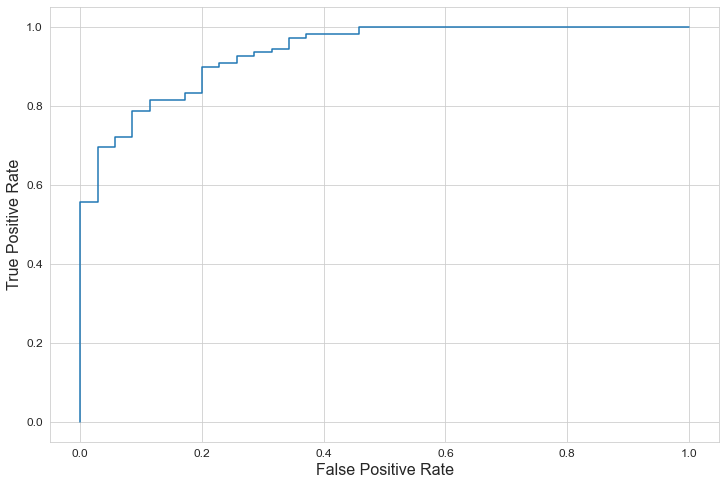

In [24]:
## Code here

## Sample Solution
plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_train,probs[:,1])

0.9357142857142857

In [27]:
coeff=pd.DataFrame(log_reg.coef_, columns= [X.columns])
coeff

,LLHold,LLLatency,LRHold,LRLatency,LSHold,LSLatency,RLHold,RLLatency,RRHold,RRLatency,...,LLatencyKurt,RHoldKurt,RLatencyKurt,SHoldKurt,SLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,HoldMean,LatencyMean
0,-0.173334,-0.117408,0.517477,0.166728,0.350814,-0.014806,-0.419745,-0.077181,-0.942831,0.026108,...,-0.051569,-0.095765,-0.065465,0.239029,0.274669,-0.321068,-0.414729,0.65118,0.11006,-0.160933


<IPython.core.display.Javascript object>


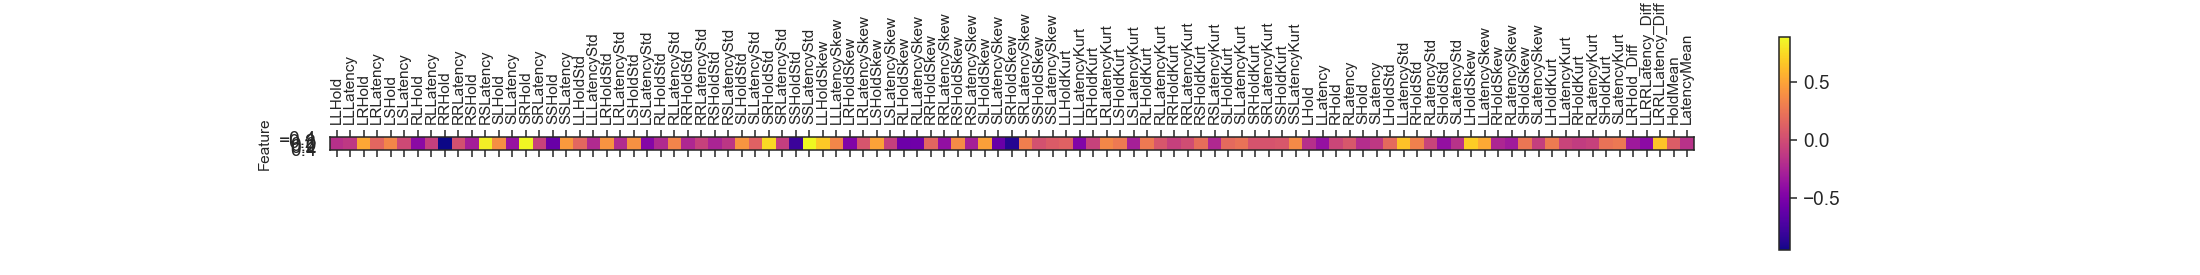

In [34]:
#rslt_df = coeff.sort_values
#rslt_df


#plt.figure(figsize=(12,14))

%matplotlib notebook


sns.set_style("white")


plt.matshow(log_reg.coef_, cmap = 'plasma')

#plt.yticks([0,1],X.columns,fontsize = 8)

plt.colorbar()

plt.xticks(range(len(X.columns)),
           X.columns,
           rotation=90,
           fontsize = 8)

plt.ylabel("Feature", fontsize = 8)

plt.show()

<IPython.core.display.Javascript object>


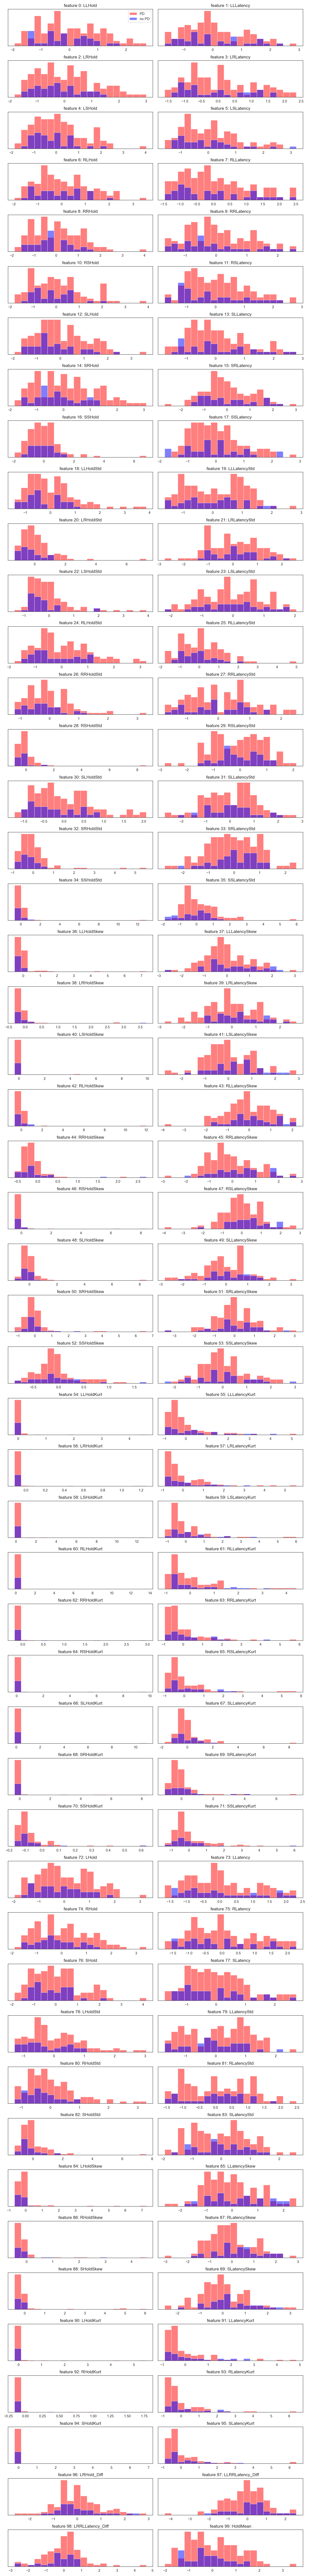

In [35]:
fig, axes = plt.subplots(50, 2, figsize = (12,100))

ax = axes.ravel()

for i in range(100):
    _, bins = np.histogram(X_train[:, i], bins = 20)
    ax[i].hist(X_train[y_train == 1, i], bins = bins, color = 'red', alpha = .5)
    ax[i].hist(X_train[y_train == 0, i], bins = bins, color = 'blue', alpha = .5)
    ax[i].set_title("feature " + str(i) + ": " + X.columns[i])
    ax[i].set_yticks(())

ax[0].legend(['PD', 'no PD'], loc = 'best')
    
fig.tight_layout()

In [36]:
plt.close()

In [37]:
log_reg.fit(X_test,y_test)
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[11,  1],
       [ 0, 36]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))

0.972972972972973
1.0


In [39]:
probs_test = log_reg.predict_proba(X_test)

In [40]:
roc_curve(y_test,probs_test[:,1])

(array([0., 0., 0., 1.]),
 array([0.        , 0.02777778, 1.        , 1.        ]),
 array([1.99999986e+00, 9.99999864e-01, 6.91524396e-01, 6.75567172e-04]))

In [41]:
fpr_test,tpr_test,cutoffs_test = roc_curve(y_test,probs_test[:,1])

<IPython.core.display.Javascript object>


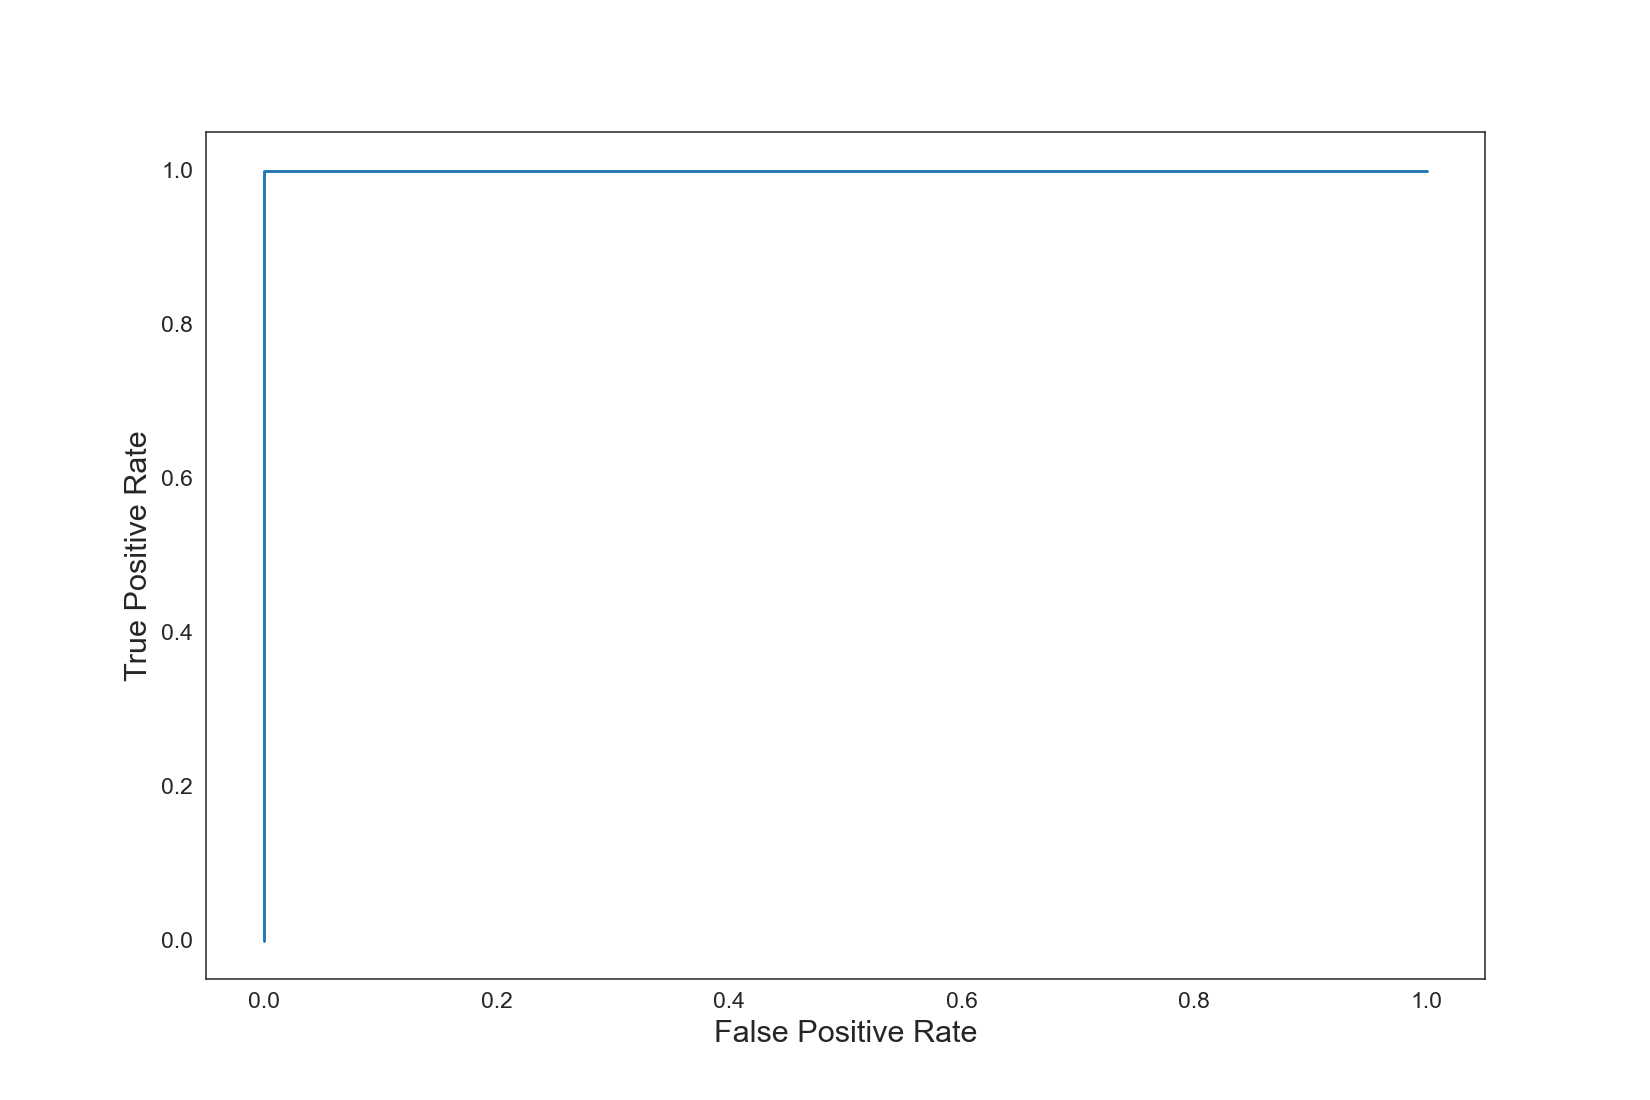

In [44]:
plt.figure(figsize=(12,8))

plt.plot(fpr_test,tpr_test)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [45]:
roc_auc_score(y_test,probs_test[:,1])

1.0

In [46]:
plt.close()

In [53]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

probs = log_reg.predict_proba(X_test)[:,1]

y_pred = 1*(probs>.31)

In [54]:
print("The test set F1 score is", f1_score(y_test,y_pred))

The test set F1 score is 0.8205128205128205


In [55]:
## Write code to calculate the accuracy for any cutoff, then choose your cutoff
cutoff = .5

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train)[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob > cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.5 is 0.8881118881118881


In [56]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

<IPython.core.display.Javascript object>


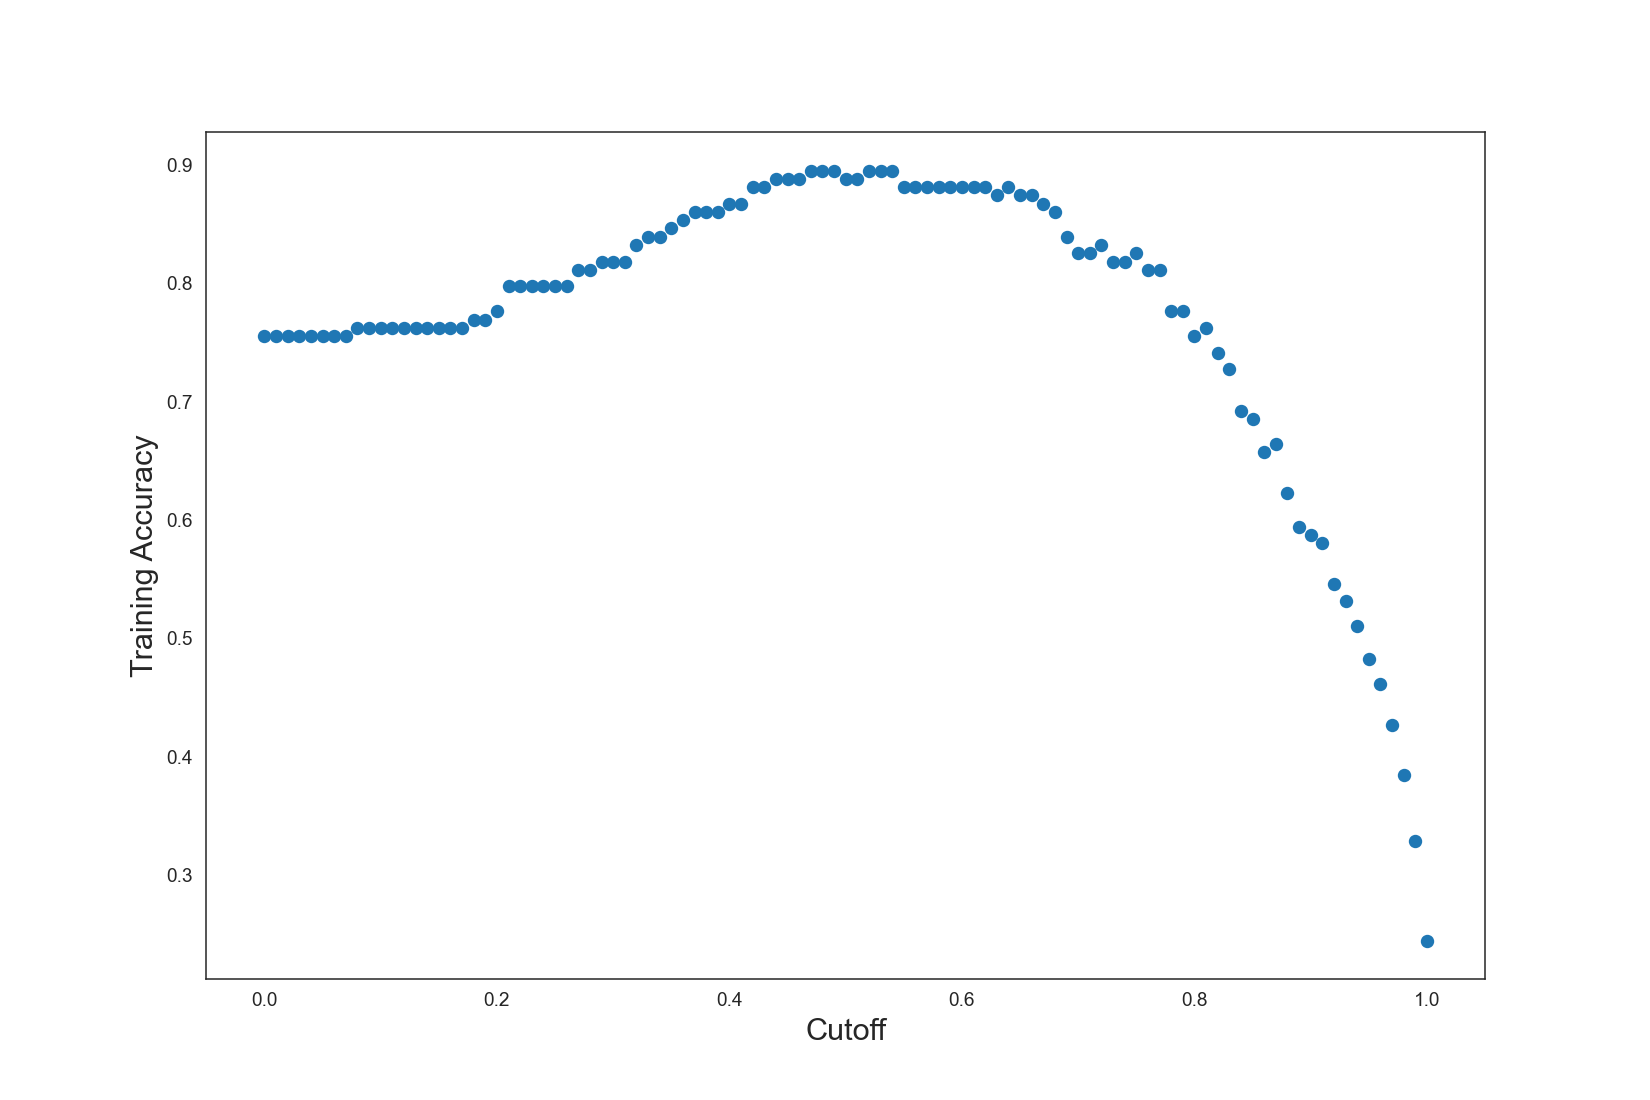

In [57]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

In [58]:
plt.close()